## preparation

In [1]:
import numpy as np
import networkx as nx
from scipy.stats import entropy
import matplotlib.pyplot as plt
import random

%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
from func.EI_calculation import tpm_ei
from func.p_calculation import calculate_or_p
from func.p_calculation import calculate_xor_p
from func.p_calculation import noise_modify_p

In [2]:
%run EI_calculation.ipynb

In [3]:
%run p_calculation.ipynb

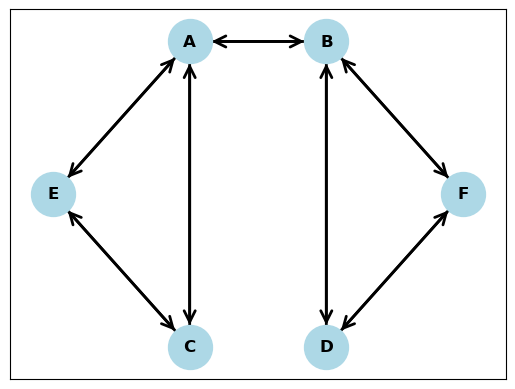

In [4]:
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'A'), ('A', 'E'), ('C', 'E'), ('E', 'C'), ('B', 'D'), 
                  ('D', 'B'), ('D', 'F'), ('F', 'D'), ('B', 'F'), ('E', 'A'), ('F', 'B')])
pos = {'A': (1, 2), 'B': (2, 2), 'C': (1, 0), 'D': (2, 0), 'E': (0, 1), 'F': (3, 1)}
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', font_weight='bold', arrows=True, 
                 labels={node: node for node in G.nodes()}, node_size=1000, width=2, arrowstyle='->', arrowsize=20)
plt.show()

# ACE或——BDF异或___________0.1噪音

In [5]:
logic_1noise_result = {}

## 整体

In [6]:
Col = ['{:06b}'.format(i) for i in range(64)]
ALL = np.empty((64, 64))

for i in range(ALL.shape[0]):
    pa = calculate_or_p(i, 0,1,2,4) 
    pa = noise_modify_p(pa, 0.1)
    pb = calculate_xor_p(i, 1,0,3,5)
    pb = noise_modify_p(pb, 0.1)
    pc = calculate_or_p(i, 2,0,4)
    pc = noise_modify_p(pc, 0.1)
    pd = calculate_xor_p(i, 3,1,5)
    pd = noise_modify_p(pd, 0.1)
    pe = calculate_or_p(i, 4,0,2)
    pe = noise_modify_p(pe, 0.1)
    pf = calculate_xor_p(i, 5,1,3)
    pf = noise_modify_p(pf, 0.1)

    ALL[i] = np.kron(pa, np.kron(pb, np.kron(pc, np.kron(pd, np.kron(pe, pf)))))

In [7]:
ALL_ei = tpm_ei(ALL, log_base = 2)
ALL_ei

np.float64(1.70351918935062)

In [8]:
logic_1noise_result['ALL_ei'] = ALL_ei
logic_1noise_result

{'ALL_ei': np.float64(1.70351918935062)}

## ACE

In [9]:
# B=0
Col = ['{:03b}0'.format(i) for i in range(8)]  
ACE_B_0 = np.empty((8, 8))

for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.1)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.1)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.1)

    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

In [10]:
# B=1
Col = ['{:03b}1'.format(i) for i in range(8)]
ACE_B_1 = np.empty((8, 8))

for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.1)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.1)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.1)
   
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

In [11]:
ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)
ACE_B_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2

In [12]:
logic_1noise_result['ACE_B_0_ei'] = ACE_B_0_ei
logic_1noise_result['ACE_B_1_ei'] = ACE_B_1_ei
logic_1noise_result['ACE_B_ei'] = ACE_B_ei

In [13]:
ACE = np.mean([ACE_B_0, ACE_B_1], axis=0)
ACE

array([[0.405, 0.045, 0.045, 0.005, 0.405, 0.045, 0.045, 0.005],
       [0.001, 0.009, 0.009, 0.081, 0.009, 0.081, 0.081, 0.729],
       [0.001, 0.009, 0.009, 0.081, 0.009, 0.081, 0.081, 0.729],
       [0.001, 0.009, 0.009, 0.081, 0.009, 0.081, 0.081, 0.729],
       [0.001, 0.009, 0.009, 0.081, 0.009, 0.081, 0.081, 0.729],
       [0.001, 0.009, 0.009, 0.081, 0.009, 0.081, 0.081, 0.729],
       [0.001, 0.009, 0.009, 0.081, 0.009, 0.081, 0.081, 0.729],
       [0.001, 0.009, 0.009, 0.081, 0.009, 0.081, 0.081, 0.729]])

In [14]:
ACE_ei = tpm_ei(ACE, log_base = 2)

In [15]:
logic_1noise_result['ACE_ei'] = ACE_ei
logic_1noise_result

{'ALL_ei': np.float64(1.70351918935062),
 'ACE_B_0_ei': np.float64(0.4562408059655874),
 'ACE_B_1_ei': np.float64(0.3884205694381191),
 'ACE_B_ei': np.float64(0.4223306877018532),
 'ACE_ei': np.float64(0.40706815278210534)}

## BDF

In [16]:
Col = ['{:03b}0'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))

for i in range(BDF_A_0.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.1)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.1)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.1)

    BDF_A_0[i] = np.kron(pb, np.kron(pd, pf))

In [17]:
Col = ['{:03b}1'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))

for i in range(BDF_A_1.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.1)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.1)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.1)
    
    BDF_A_1[i] = np.kron(pb, np.kron(pd, pf))

In [18]:
BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)
BDF_A_ei = (BDF_A_0_ei + BDF_A_1_ei) / 2


In [19]:
logic_1noise_result['BDF_A_0_ei'] = BDF_A_0_ei
logic_1noise_result['BDF_A_1_ei'] = BDF_A_1_ei
logic_1noise_result['BDF_A_ei'] = BDF_A_ei

In [20]:
BDF = np.mean([BDF_A_0, BDF_A_1], axis=0)
BDF

array([[0.405, 0.045, 0.045, 0.005, 0.405, 0.045, 0.045, 0.005],
       [0.005, 0.045, 0.045, 0.405, 0.005, 0.045, 0.045, 0.405],
       [0.005, 0.045, 0.045, 0.405, 0.005, 0.045, 0.045, 0.405],
       [0.405, 0.045, 0.045, 0.005, 0.405, 0.045, 0.045, 0.005],
       [0.005, 0.045, 0.045, 0.405, 0.005, 0.045, 0.045, 0.405],
       [0.405, 0.045, 0.045, 0.005, 0.405, 0.045, 0.045, 0.005],
       [0.405, 0.045, 0.045, 0.005, 0.405, 0.045, 0.045, 0.005],
       [0.005, 0.045, 0.045, 0.405, 0.005, 0.045, 0.045, 0.405]])

In [21]:
BDF_ei = tpm_ei(BDF, log_base = 2)

In [22]:
logic_1noise_result['BDF_ei'] = BDF_ei
logic_1noise_result

{'ALL_ei': np.float64(1.70351918935062),
 'ACE_B_0_ei': np.float64(0.4562408059655874),
 'ACE_B_1_ei': np.float64(0.3884205694381191),
 'ACE_B_ei': np.float64(0.4223306877018532),
 'ACE_ei': np.float64(0.40706815278210534),
 'BDF_A_0_ei': np.float64(0.8624177306350442),
 'BDF_A_1_ei': np.float64(0.8624177306350442),
 'BDF_A_ei': np.float64(0.8624177306350442),
 'BDF_ei': np.float64(0.7420858585497175)}

## A

In [23]:
Col = ['0000', '1000']
A_BCE_000 = np.empty((2, 2))

for i in range(A_BCE_000.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3)
    A_BCE_000[i] = noise_modify_p(pa, 0.1)

In [24]:
Col = ['0001', '1001']
A_BCE_001 = np.empty((2, 2))

for i in range(A_BCE_001.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3)
    A_BCE_001[i] = noise_modify_p(pa, 0.1)

In [25]:
Col = ['0010', '1010']
A_BCE_010 = np.empty((2, 2))

for i in range(A_BCE_010.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3)
    A_BCE_010[i] = noise_modify_p(pa, 0.1)

In [26]:
Col = ['0011', '1011']
A_BCE_011 = np.empty((2, 2))

for i in range(A_BCE_011.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3)
    A_BCE_011[i] = noise_modify_p(pa, 0.1)

In [27]:
Col = ['0100', '1100']
A_BCE_100 = np.empty((2, 2))

for i in range(A_BCE_100.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3)
    A_BCE_100[i] = noise_modify_p(pa, 0.1)

In [28]:
Col = ['0101', '1101']
A_BCE_101 = np.empty((2, 2))

for i in range(A_BCE_101.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3)
    A_BCE_101[i] = noise_modify_p(pa, 0.1)

In [29]:
Col = ['0110', '1110']
A_BCE_110 = np.empty((2, 2))

for i in range(A_BCE_110.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3)
    A_BCE_110[i] = noise_modify_p(pa, 0.1)

In [30]:
Col = ['0111', '1111']
A_BCE_111 = np.empty((2, 2))

for i in range(A_BCE_111.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3)
    A_BCE_111[i] = noise_modify_p(pa, 0.1)

In [31]:
A_BCE_000_ei = tpm_ei(A_BCE_000, log_base = 2)
A_BCE_001_ei = tpm_ei(A_BCE_001, log_base = 2)
A_BCE_010_ei = tpm_ei(A_BCE_010, log_base = 2)
A_BCE_011_ei = tpm_ei(A_BCE_011, log_base = 2)
A_BCE_100_ei = tpm_ei(A_BCE_100, log_base = 2)
A_BCE_101_ei = tpm_ei(A_BCE_101, log_base = 2)
A_BCE_110_ei = tpm_ei(A_BCE_110, log_base = 2)
A_BCE_111_ei = tpm_ei(A_BCE_111, log_base = 2)
A_BCE_ei = (A_BCE_000_ei + A_BCE_001_ei + A_BCE_010_ei + A_BCE_011_ei + A_BCE_100_ei + A_BCE_101_ei + A_BCE_110_ei + A_BCE_111_ei) / 8

In [32]:
logic_1noise_result['A_BCE_000_ei'] = A_BCE_000_ei
logic_1noise_result['A_BCE_001_ei'] = A_BCE_001_ei
logic_1noise_result['A_BCE_010_ei'] = A_BCE_010_ei
logic_1noise_result['A_BCE_011_ei'] = A_BCE_011_ei
logic_1noise_result['A_BCE_100_ei'] = A_BCE_100_ei
logic_1noise_result['A_BCE_101_ei'] = A_BCE_101_ei
logic_1noise_result['A_BCE_110_ei'] = A_BCE_110_ei
logic_1noise_result['A_BCE_111_ei'] = A_BCE_111_ei

logic_1noise_result['A_BCE_ei'] = A_BCE_ei

In [33]:
A = np.mean([A_BCE_000, A_BCE_001, A_BCE_010, A_BCE_011, A_BCE_100, A_BCE_101, A_BCE_110, A_BCE_111], axis=0)
A

array([[0.2, 0.8],
       [0.1, 0.9]])

In [34]:
A_ei = tpm_ei(A, log_base = 2)

In [35]:
logic_1noise_result['A_ei'] = A_ei
logic_1noise_result

{'ALL_ei': np.float64(1.70351918935062),
 'ACE_B_0_ei': np.float64(0.4562408059655874),
 'ACE_B_1_ei': np.float64(0.3884205694381191),
 'ACE_B_ei': np.float64(0.4223306877018532),
 'ACE_ei': np.float64(0.40706815278210534),
 'BDF_A_0_ei': np.float64(0.8624177306350442),
 'BDF_A_1_ei': np.float64(0.8624177306350442),
 'BDF_A_ei': np.float64(0.8624177306350442),
 'BDF_ei': np.float64(0.7420858585497175),
 'A_BCE_000_ei': np.float64(0.5310044064107188),
 'A_BCE_001_ei': np.float64(0.0),
 'A_BCE_010_ei': np.float64(0.0),
 'A_BCE_011_ei': np.float64(0.0),
 'A_BCE_100_ei': np.float64(0.0),
 'A_BCE_101_ei': np.float64(0.0),
 'A_BCE_110_ei': np.float64(0.0),
 'A_BCE_111_ei': np.float64(0.0),
 'A_BCE_ei': np.float64(0.06637555080133985),
 'A_ei': np.float64(0.014378460478078663)}

## B

In [36]:
Col = ['0000', '1000']
B_ADF_000 = np.empty((2, 2))

for i in range(B_ADF_000.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)
    B_ADF_000[i] = noise_modify_p(pb, 0.1)

In [37]:
Col = ['0001', '1001']
B_ADF_001 = np.empty((2, 2))

for i in range(B_ADF_001.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)
    B_ADF_001[i] = noise_modify_p(pb, 0.1)

In [38]:
Col = ['0010', '1010']
B_ADF_010 = np.empty((2, 2))

for i in range(B_ADF_010.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)
    B_ADF_010[i] = noise_modify_p(pb, 0.1)

In [39]:
Col = ['0011', '1011']
B_ADF_011 = np.empty((2, 2))

for i in range(B_ADF_011.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)
    B_ADF_011[i] = noise_modify_p(pb, 0.1)

In [40]:
Col = ['0100', '1100']
B_ADF_100 = np.empty((2, 2))

for i in range(B_ADF_100.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)
    B_ADF_100[i] = noise_modify_p(pb, 0.1)

In [41]:
Col = ['0101', '1101']
B_ADF_101 = np.empty((2, 2))

for i in range(B_ADF_101.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)
    B_ADF_101[i] = noise_modify_p(pb, 0.1)

In [42]:
Col = ['0110', '1110']
B_ADF_110 = np.empty((2, 2))

for i in range(B_ADF_110.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)
    B_ADF_110[i] = noise_modify_p(pb, 0.1)

In [43]:
Col = ['0111', '1111']
B_ADF_111 = np.empty((2, 2))

for i in range(B_ADF_111.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)
    B_ADF_111[i] = noise_modify_p(pb, 0.1)

In [44]:
B_ADF_000_ei = tpm_ei(B_ADF_000, log_base = 2)
B_ADF_001_ei = tpm_ei(B_ADF_001, log_base = 2)
B_ADF_010_ei = tpm_ei(B_ADF_010, log_base = 2)
B_ADF_011_ei = tpm_ei(B_ADF_011, log_base = 2)
B_ADF_100_ei = tpm_ei(B_ADF_100, log_base = 2)
B_ADF_101_ei = tpm_ei(B_ADF_101, log_base = 2)
B_ADF_110_ei = tpm_ei(B_ADF_110, log_base = 2)
B_ADF_111_ei = tpm_ei(B_ADF_111, log_base = 2)
B_ADF_ei = (B_ADF_000_ei + B_ADF_001_ei + B_ADF_010_ei + B_ADF_011_ei + B_ADF_100_ei + B_ADF_101_ei + B_ADF_110_ei + B_ADF_111_ei) / 8

In [45]:
logic_1noise_result['B_ADF_000_ei'] = B_ADF_000_ei
logic_1noise_result['B_ADF_001_ei'] = B_ADF_001_ei
logic_1noise_result['B_ADF_010_ei'] = B_ADF_010_ei
logic_1noise_result['B_ADF_011_ei'] = B_ADF_011_ei
logic_1noise_result['B_ADF_100_ei'] = B_ADF_100_ei
logic_1noise_result['B_ADF_101_ei'] = B_ADF_101_ei
logic_1noise_result['B_ADF_110_ei'] = B_ADF_110_ei
logic_1noise_result['B_ADF_111_ei'] = B_ADF_111_ei

logic_1noise_result['B_ADF_ei'] = B_ADF_ei

In [46]:
B = np.mean([B_ADF_000, B_ADF_001, B_ADF_010, B_ADF_011, B_ADF_100, B_ADF_101, B_ADF_110, B_ADF_111], axis=0)
B

array([[0.5, 0.5],
       [0.5, 0.5]])

In [47]:
B_ei = tpm_ei(B, log_base = 2)

In [48]:
logic_1noise_result['B_ei'] = B_ei
logic_1noise_result

{'ALL_ei': np.float64(1.70351918935062),
 'ACE_B_0_ei': np.float64(0.4562408059655874),
 'ACE_B_1_ei': np.float64(0.3884205694381191),
 'ACE_B_ei': np.float64(0.4223306877018532),
 'ACE_ei': np.float64(0.40706815278210534),
 'BDF_A_0_ei': np.float64(0.8624177306350442),
 'BDF_A_1_ei': np.float64(0.8624177306350442),
 'BDF_A_ei': np.float64(0.8624177306350442),
 'BDF_ei': np.float64(0.7420858585497175),
 'A_BCE_000_ei': np.float64(0.5310044064107188),
 'A_BCE_001_ei': np.float64(0.0),
 'A_BCE_010_ei': np.float64(0.0),
 'A_BCE_011_ei': np.float64(0.0),
 'A_BCE_100_ei': np.float64(0.0),
 'A_BCE_101_ei': np.float64(0.0),
 'A_BCE_110_ei': np.float64(0.0),
 'A_BCE_111_ei': np.float64(0.0),
 'A_BCE_ei': np.float64(0.06637555080133985),
 'A_ei': np.float64(0.014378460478078663),
 'B_ADF_000_ei': np.float64(0.5310044064107188),
 'B_ADF_001_ei': np.float64(0.5310044064107188),
 'B_ADF_010_ei': np.float64(0.5310044064107188),
 'B_ADF_011_ei': np.float64(0.5310044064107188),
 'B_ADF_100_ei': np.fl

## C

In [49]:
Col = ['000', '100']
C_AE_00 = np.empty((2, 2))

for i in range(C_AE_00.shape[0]):  
    pc = calculate_or_p(i, 0,1,2)
    C_AE_00[i] = noise_modify_p(pc, 0.1)

In [50]:
Col = ['001', '101']
C_AE_01 = np.empty((2, 2))

for i in range(C_AE_01.shape[0]):  
    pc = calculate_or_p(i, 0,1,2)
    C_AE_01[i] = noise_modify_p(pc, 0.1)

In [51]:
Col = ['010', '110']
C_AE_10 = np.empty((2, 2))

for i in range(C_AE_10.shape[0]):  
    pc = calculate_or_p(i, 0,1,2)
    C_AE_10[i] = noise_modify_p(pc, 0.1)

In [52]:
Col = ['011', '111']
C_AE_11 = np.empty((2, 2))

for i in range(C_AE_11.shape[0]):  
    pc = calculate_or_p(i, 0,1,2)
    C_AE_11[i] = noise_modify_p(pc, 0.1)

In [53]:
C_AE_00_ei = tpm_ei(C_AE_00, log_base = 2)
C_AE_01_ei = tpm_ei(C_AE_01, log_base = 2)
C_AE_10_ei = tpm_ei(C_AE_10, log_base = 2)
C_AE_11_ei = tpm_ei(C_AE_11, log_base = 2)

C_AE_ei = (C_AE_00_ei + C_AE_01_ei + C_AE_10_ei + C_AE_11_ei ) / 4

In [54]:
logic_1noise_result['C_AE_00_ei'] = C_AE_00_ei
logic_1noise_result['C_AE_01_ei'] = C_AE_01_ei
logic_1noise_result['C_AE_10_ei'] = C_AE_10_ei
logic_1noise_result['C_AE_11_ei'] = C_AE_11_ei

logic_1noise_result['C_AE_ei'] = C_AE_ei

In [55]:
C = np.mean([C_AE_00, C_AE_01, C_AE_10, C_AE_11], axis=0)
C

array([[0.3, 0.7],
       [0.1, 0.9]])

In [56]:
C_ei = tpm_ei(C, log_base = 2)

In [57]:
logic_1noise_result['C_ei'] = C_ei
logic_1noise_result

{'ALL_ei': np.float64(1.70351918935062),
 'ACE_B_0_ei': np.float64(0.4562408059655874),
 'ACE_B_1_ei': np.float64(0.3884205694381191),
 'ACE_B_ei': np.float64(0.4223306877018532),
 'ACE_ei': np.float64(0.40706815278210534),
 'BDF_A_0_ei': np.float64(0.8624177306350442),
 'BDF_A_1_ei': np.float64(0.8624177306350442),
 'BDF_A_ei': np.float64(0.8624177306350442),
 'BDF_ei': np.float64(0.7420858585497175),
 'A_BCE_000_ei': np.float64(0.5310044064107188),
 'A_BCE_001_ei': np.float64(0.0),
 'A_BCE_010_ei': np.float64(0.0),
 'A_BCE_011_ei': np.float64(0.0),
 'A_BCE_100_ei': np.float64(0.0),
 'A_BCE_101_ei': np.float64(0.0),
 'A_BCE_110_ei': np.float64(0.0),
 'A_BCE_111_ei': np.float64(0.0),
 'A_BCE_ei': np.float64(0.06637555080133985),
 'A_ei': np.float64(0.014378460478078663),
 'B_ADF_000_ei': np.float64(0.5310044064107188),
 'B_ADF_001_ei': np.float64(0.5310044064107188),
 'B_ADF_010_ei': np.float64(0.5310044064107188),
 'B_ADF_011_ei': np.float64(0.5310044064107188),
 'B_ADF_100_ei': np.fl

## D

In [58]:
Col = ['000', '100']
D_BF_00 = np.empty((2, 2))

for i in range(D_BF_00.shape[0]):  
    pd = calculate_xor_p(i, 0,1,2)
    D_BF_00[i] = noise_modify_p(pd, 0.1)

In [59]:
Col = ['001', '101']
D_BF_01 = np.empty((2, 2))

for i in range(D_BF_01.shape[0]):  
    pd = calculate_xor_p(i, 0,1,2)
    D_BF_01[i] = noise_modify_p(pd, 0.1)

In [60]:
Col = ['010', '110']
D_BF_10 = np.empty((2, 2))

for i in range(D_BF_10.shape[0]):  
    pd = calculate_xor_p(i, 0,1,2)
    D_BF_10[i] = noise_modify_p(pd, 0.1)

In [61]:
Col = ['011', '111']
D_BF_11 = np.empty((2, 2))

for i in range(D_BF_11.shape[0]):  
    pd = calculate_xor_p(i, 0,1,2)
    D_BF_11[i] = noise_modify_p(pd, 0.1)

In [62]:
D_BF_00_ei = tpm_ei(D_BF_00, log_base = 2)
D_BF_01_ei = tpm_ei(D_BF_01, log_base = 2)
D_BF_10_ei = tpm_ei(D_BF_10, log_base = 2)
D_BF_11_ei = tpm_ei(D_BF_11, log_base = 2)

D_BF_ei = (D_BF_00_ei + D_BF_01_ei + D_BF_10_ei + D_BF_11_ei) / 4

In [63]:
logic_1noise_result['D_BF_00_ei'] = D_BF_00_ei
logic_1noise_result['D_BF_01_ei'] = D_BF_01_ei
logic_1noise_result['D_BF_10_ei'] = D_BF_10_ei
logic_1noise_result['D_BF_11_ei'] = D_BF_11_ei

logic_1noise_result['D_BF_ei'] = D_BF_ei

In [64]:
D = np.mean([D_BF_00, D_BF_01, D_BF_10, D_BF_11], axis=0)
D

array([[0.5, 0.5],
       [0.5, 0.5]])

In [65]:
D_ei = tpm_ei(D, log_base = 2)

In [66]:
logic_1noise_result['D_ei'] = D_ei
logic_1noise_result

{'ALL_ei': np.float64(1.70351918935062),
 'ACE_B_0_ei': np.float64(0.4562408059655874),
 'ACE_B_1_ei': np.float64(0.3884205694381191),
 'ACE_B_ei': np.float64(0.4223306877018532),
 'ACE_ei': np.float64(0.40706815278210534),
 'BDF_A_0_ei': np.float64(0.8624177306350442),
 'BDF_A_1_ei': np.float64(0.8624177306350442),
 'BDF_A_ei': np.float64(0.8624177306350442),
 'BDF_ei': np.float64(0.7420858585497175),
 'A_BCE_000_ei': np.float64(0.5310044064107188),
 'A_BCE_001_ei': np.float64(0.0),
 'A_BCE_010_ei': np.float64(0.0),
 'A_BCE_011_ei': np.float64(0.0),
 'A_BCE_100_ei': np.float64(0.0),
 'A_BCE_101_ei': np.float64(0.0),
 'A_BCE_110_ei': np.float64(0.0),
 'A_BCE_111_ei': np.float64(0.0),
 'A_BCE_ei': np.float64(0.06637555080133985),
 'A_ei': np.float64(0.014378460478078663),
 'B_ADF_000_ei': np.float64(0.5310044064107188),
 'B_ADF_001_ei': np.float64(0.5310044064107188),
 'B_ADF_010_ei': np.float64(0.5310044064107188),
 'B_ADF_011_ei': np.float64(0.5310044064107188),
 'B_ADF_100_ei': np.fl

## RESULT

In [67]:
syn_ACE = logic_1noise_result['ACE_B_ei'] - logic_1noise_result['ACE_ei']
logic_1noise_result['syn_ACE'] = syn_ACE

In [68]:
syn_BDF = logic_1noise_result['BDF_A_ei'] - logic_1noise_result['BDF_ei']
logic_1noise_result['syn_BDF'] = syn_BDF

In [69]:
syn_A = logic_1noise_result['A_BCE_ei'] - logic_1noise_result['A_ei']
logic_1noise_result['syn_A'] = syn_A

In [70]:
syn_B = logic_1noise_result['B_ADF_ei'] - logic_1noise_result['B_ei']
logic_1noise_result['syn_B'] = syn_B

In [71]:
syn_C = logic_1noise_result['C_AE_ei'] - logic_1noise_result['C_ei']
logic_1noise_result['syn_C'] = syn_C

In [72]:
syn_D = logic_1noise_result['D_BF_ei'] - logic_1noise_result['D_ei']
logic_1noise_result['syn_D'] = syn_D

In [73]:
logic_1noise_result

{'ALL_ei': np.float64(1.70351918935062),
 'ACE_B_0_ei': np.float64(0.4562408059655874),
 'ACE_B_1_ei': np.float64(0.3884205694381191),
 'ACE_B_ei': np.float64(0.4223306877018532),
 'ACE_ei': np.float64(0.40706815278210534),
 'BDF_A_0_ei': np.float64(0.8624177306350442),
 'BDF_A_1_ei': np.float64(0.8624177306350442),
 'BDF_A_ei': np.float64(0.8624177306350442),
 'BDF_ei': np.float64(0.7420858585497175),
 'A_BCE_000_ei': np.float64(0.5310044064107188),
 'A_BCE_001_ei': np.float64(0.0),
 'A_BCE_010_ei': np.float64(0.0),
 'A_BCE_011_ei': np.float64(0.0),
 'A_BCE_100_ei': np.float64(0.0),
 'A_BCE_101_ei': np.float64(0.0),
 'A_BCE_110_ei': np.float64(0.0),
 'A_BCE_111_ei': np.float64(0.0),
 'A_BCE_ei': np.float64(0.06637555080133985),
 'A_ei': np.float64(0.014378460478078663),
 'B_ADF_000_ei': np.float64(0.5310044064107188),
 'B_ADF_001_ei': np.float64(0.5310044064107188),
 'B_ADF_010_ei': np.float64(0.5310044064107188),
 'B_ADF_011_ei': np.float64(0.5310044064107188),
 'B_ADF_100_ei': np.fl

In [75]:
for key in logic_1noise_result:
    if isinstance(logic_1noise_result[key], float):
        logic_1noise_result[key] = round(logic_1noise_result[key], 2)

In [76]:
logic_1noise_result

{'ALL_ei': np.float64(1.7),
 'ACE_B_0_ei': np.float64(0.46),
 'ACE_B_1_ei': np.float64(0.39),
 'ACE_B_ei': np.float64(0.42),
 'ACE_ei': np.float64(0.41),
 'BDF_A_0_ei': np.float64(0.86),
 'BDF_A_1_ei': np.float64(0.86),
 'BDF_A_ei': np.float64(0.86),
 'BDF_ei': np.float64(0.74),
 'A_BCE_000_ei': np.float64(0.53),
 'A_BCE_001_ei': np.float64(0.0),
 'A_BCE_010_ei': np.float64(0.0),
 'A_BCE_011_ei': np.float64(0.0),
 'A_BCE_100_ei': np.float64(0.0),
 'A_BCE_101_ei': np.float64(0.0),
 'A_BCE_110_ei': np.float64(0.0),
 'A_BCE_111_ei': np.float64(0.0),
 'A_BCE_ei': np.float64(0.07),
 'A_ei': np.float64(0.01),
 'B_ADF_000_ei': np.float64(0.53),
 'B_ADF_001_ei': np.float64(0.53),
 'B_ADF_010_ei': np.float64(0.53),
 'B_ADF_011_ei': np.float64(0.53),
 'B_ADF_100_ei': np.float64(0.53),
 'B_ADF_101_ei': np.float64(0.53),
 'B_ADF_110_ei': np.float64(0.53),
 'B_ADF_111_ei': np.float64(0.53),
 'B_ADF_ei': np.float64(0.53),
 'B_ei': np.float64(0.0),
 'C_AE_00_ei': np.float64(0.53),
 'C_AE_01_ei': np.f